# Import Librerías

In [751]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [752]:
import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [753]:
# Para importar el Helper
%cd "/content/drive/Shareddrives/Redes de Piluchina/TP 1 de Redes"
!pip install import-ipynb
import import_ipynb
from Helper import *

/content/drive/Shareddrives/Redes de Piluchina/TP 1 de Redes
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Modelo QDA

 El análisis discriminante cuadrático (Quadratic Discriminant Analysis o QDA) supone una alternativa al LDA cuando cada clase tiene su propia matriz de covarianza (Σk). Al igual que LDA, QDA también asume que las observaciones de cada clase siguen una distribución normal multivariante, así como también introduce las estimaciones de los parámetros en la ecuación del teorema de Bayes para obtener las predicciones.
Tal como se vio que es el caso de nuestros datos.
Se calcularon las metricas f1-macro, f1-micro y la curva ROC para el caso binario.

En cuanto a los atributos se sabe que:
- erl y pox son binarios, por lo que no se tuvieron en cuentra a la hora de armar las key.


Se tomo de manera aleatroia tres grupos para entrenar los modelos:

In [754]:
keys = ['mcg','gvh','alm','mit','vac','nuc']
keys_2 = ['mcg','gvh','alm','mit']
keys_3 = ['mit','vac','nuc','gvh']

##Caso 1: 4 clases

Se exportaron los cvs con los datos

In [755]:
df_train = pd.read_csv('/content/drive/Shareddrives/Redes de Piluchina/TP 1 de Redes/Set_train_cv_test/train_dataset_4clases.csv')
df_valid = pd.read_csv('/content/drive/Shareddrives/Redes de Piluchina/TP 1 de Redes/Set_train_cv_test/valid_dataset_4clases.csv')
df_test = pd.read_csv('/content/drive/Shareddrives/Redes de Piluchina/TP 1 de Redes/Set_train_cv_test/test_dataset_4clases.csv')

In [756]:
df_train_sin_procesar = pd.read_csv('/content/drive/Shareddrives/Redes de Piluchina/TP 1 de Redes/Set_train_cv_test_sin_procesar/train_dataset_4clases_sin_procesar.csv')
df_valid_sin_procesar = pd.read_csv('/content/drive/Shareddrives/Redes de Piluchina/TP 1 de Redes/Set_train_cv_test_sin_procesar/valid_dataset_4clases_sin_procesar.csv')
df_test_sin_procesar = pd.read_csv('/content/drive/Shareddrives/Redes de Piluchina/TP 1 de Redes/Set_train_cv_test_sin_procesar/test_dataset_4clases_sin_procesar.csv')

In [757]:
df_train = pd.concat([df_train,df_valid]).reset_index()

In [758]:
df_train_sin_procesar = pd.concat([df_train_sin_procesar,df_valid_sin_procesar]).reset_index()

In [759]:
df_train.head()

,index,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
0,0,0.581981,0.888481,-0.346645,-0.957203,-0.09759,-0.099131,-0.344175,-0.527919,MIT
1,1,-0.510891,1.372811,-0.231226,0.064312,-0.09759,-0.099131,0.521219,-0.527919,MIT
2,2,0.581981,-0.483786,0.807542,-0.957203,-0.09759,-0.099131,0.694298,-0.527919,NUC
3,3,-0.583749,-0.483786,-0.231226,2.034375,-0.09759,-0.099131,-0.344175,-0.527919,MIT
4,4,0.071974,-0.806672,0.692124,-0.665341,-0.09759,6.509628,-0.171096,-0.527919,CYT


Primer grupo de atributos.

In [760]:
modelo, f1_micro, f1_macro, enc = modeloQDA(df_train,keys)

In [761]:
f1_micro

0.5965751587230619

In [762]:
f1_macro

0.5965751587230619

In [763]:
predict_test, labels_test = predicctions(df_test,keys,enc,modelo)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [764]:
f1_macro_test = f1_score(labels_test, predict_test, average='macro')
f1_macro_test

0.6616274638476183

Segundo grupo de atributos.

In [765]:
modelo_2, f1_micro_2, f1_macro_2, enc_2 = modeloQDA(df_train,keys_2)

In [766]:
f1_micro_2

0.5710408655995708

In [767]:
f1_macro_2

0.5710408655995708

In [768]:
predict_test_2, labels_test_2 = predicctions(df_test,keys_2,enc_2,modelo_2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [769]:
f1_macro_test_2 = f1_score(labels_test_2, predict_test_2, average='macro')
f1_macro_test_2

0.6136999283452373

Tercer grupo de atributos.

In [770]:
modelo_3, f1_micro_3, f1_macro_3, enc_3 = modeloQDA(df_train,keys_3)

In [771]:
f1_micro_3

0.5037646427613343

In [772]:
f1_macro_3

0.5037646427613343

In [773]:
predict_test_3, labels_test_3 = predicctions(df_test,keys_3,enc_3,modelo_3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [774]:
f1_macro_test_3 = f1_score(labels_test_3, predict_test_3, average='macro')
f1_macro_test_3

0.45033098709569297

##Data sin procesar

Primer grupo de atributos.

In [775]:
modelo_sin_procesar, f1_micro_sin_procesar, f1_macro_sin_procesar, enc_sin_procesar = modeloQDA(df_train_sin_procesar,keys)

In [776]:
f1_micro_sin_procesar

0.6063348416289592

In [777]:
f1_macro_sin_procesar

0.6063348416289592

In [778]:
predict_test_sin_procesar, labels_test_sin_procesar = predicctions(df_test_sin_procesar,keys,enc_sin_procesar,modelo_sin_procesar)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [779]:
f1_macro_test_sin_procesar = f1_score(labels_test_sin_procesar, predict_test_sin_procesar, average='macro')
f1_macro_test_sin_procesar

0.634936099602358

Segundo grupo de atributos.

In [780]:
modelo_sin_procesar_2, f1_micro_sin_procesar_2, f1_macro_sin_procesar_2, enc_sin_procesar_2 = modeloQDA(df_train_sin_procesar,keys_2)

In [781]:
f1_micro_sin_procesar_2

0.5547511312217195

In [782]:
f1_macro_sin_procesar_2

0.5547511312217195

In [783]:
predict_test_sin_procesar_2, labels_test_sin_procesar_2 = predicctions(df_test_sin_procesar,keys_2,enc_sin_procesar_2,modelo_sin_procesar_2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [784]:
f1_macro_test_sin_procesar_2 = f1_score(labels_test_sin_procesar_2, predict_test_sin_procesar_2, average='macro')
f1_macro_test_sin_procesar_2

0.6170293706108954

Tercer grupo de atributos.

In [785]:
modelo_sin_procesar_3, f1_micro_sin_procesar_3, f1_macro_sin_procesar_3, enc_sin_procesar_3 = modeloQDA(df_train_sin_procesar,keys_3)

In [786]:
f1_micro_sin_procesar_3

0.5004524886877828

In [787]:
f1_macro_sin_procesar_3

0.5004524886877828

In [788]:
predict_test_sin_procesar_3, labels_test_sin_procesar_3 = predicctions(df_test_sin_procesar,keys_3,enc_sin_procesar_3,modelo_sin_procesar_3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [789]:
f1_macro_test_sin_procesar_3 = f1_score(labels_test_sin_procesar_3, predict_test_sin_procesar_3, average='macro')
f1_macro_test_sin_procesar_3

0.4178669228780293

##Caso 2: las 4 clases mas significativas y la suma de las otras

In [790]:
df_train_caso_2 = pd.read_csv('/content/drive/Shareddrives/Redes de Piluchina/TP 1 de Redes/Set_train_cv_test_2/train_dataset_5clases.csv')
df_valid_caso_2 = pd.read_csv('/content/drive/Shareddrives/Redes de Piluchina/TP 1 de Redes/Set_train_cv_test_2/valid_dataset_5clases.csv')
df_test_caso_2 = pd.read_csv('/content/drive/Shareddrives/Redes de Piluchina/TP 1 de Redes/Set_train_cv_test_2/test_dataset_5clases.csv')

In [791]:
df_train_caso_2_sin_procesar = pd.read_csv('/content/drive/Shareddrives/Redes de Piluchina/TP 1 de Redes/Set_train_cv_test_2_sin_procesar/train_dataset_5clases_sin_procesar.csv')
df_valid_caso_2_sin_procesar = pd.read_csv('/content/drive/Shareddrives/Redes de Piluchina/TP 1 de Redes/Set_train_cv_test_2_sin_procesar/valid_dataset_5clases_sin_procesar.csv')
df_test_caso_2_sin_procesar = pd.read_csv('/content/drive/Shareddrives/Redes de Piluchina/TP 1 de Redes/Set_train_cv_test_2_sin_procesar/test_dataset_5clases_sin_procesar.csv')

In [792]:
df_train_caso_2 = pd.concat([df_train_caso_2,df_valid_caso_2]).reset_index()

In [793]:
df_train_caso_2_sin_procesar = pd.concat([df_train_caso_2_sin_procesar,df_valid_caso_2_sin_procesar]).reset_index()

Primer grupo de atributos.

In [794]:
modelo_caso_2_1, f1_micro_caso_2_1, f1_macro_caso_2_1, enc_caso_2_1 = modeloQDA(df_train_caso_2,keys)

In [795]:
f1_micro_caso_2_1

0.5957033859568932

In [796]:
f1_macro_caso_2_1

0.5957033859568932

In [797]:
predict_test_caso_2_1, labels_test_caso_2_1 = predicctions(df_test_caso_2,keys,enc_caso_2_1,modelo_caso_2_1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [798]:
f1_macro_test_caso_2_1 = f1_score(labels_test_caso_2_1, predict_test_caso_2_1, average='macro')
f1_macro_test_caso_2_1

0.649697816302005

Segundo grupo de atributos

In [799]:
modelo_caso_2_2, f1_micro_caso_2_2, f1_macro_caso_2_2, enc_caso_2_2 = modeloQDA(df_train_caso_2,keys_2)

In [800]:
f1_micro_caso_2_2

0.5579269364649626

In [801]:
f1_macro_caso_2_2

0.5579269364649626

In [802]:
predict_test_caso_2_2, labels_test_caso_2_2 = predicctions(df_test_caso_2,keys_2,enc_caso_2_2,modelo_caso_2_2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [803]:
f1_macro_test_caso_2_2 = f1_score(labels_test_caso_2_2, predict_test_caso_2_2, average='macro')
f1_macro_test_caso_2_2

0.6027364851741348

Tercer grupo de atributos

In [804]:
modelo_caso_2_3, f1_micro_caso_2_3, f1_macro_caso_2_3, enc_caso_2_3 = modeloQDA(df_train_caso_2,keys_3)

In [805]:
f1_micro_caso_2_3

0.48742660244013924

In [806]:
f1_macro_caso_2_3

0.48742660244013924

In [807]:
predict_test_caso_2_3, labels_test_caso_2_3 = predicctions(df_test_caso_2,keys_3,enc_caso_2_3,modelo_caso_2_3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [808]:
f1_macro_test_caso_2_3 = f1_score(labels_test_caso_2_3, predict_test_caso_2_3, average='macro')
f1_macro_test_caso_2_3

0.4301223778324106

##Data sin procesar

Primer grupo de atributos.

In [809]:
modelo_caso_2_1_sin_procesar, f1_micro_caso_2_1_sin_procesar, f1_macro_caso_2_1_sin_procesar, enc_caso_2_1_sin_procesar = modeloQDA(df_train_caso_2_sin_procesar,keys)

In [810]:
f1_micro_caso_2_1_sin_procesar

0.5974967061923584

In [811]:
f1_macro_caso_2_1_sin_procesar

0.5974967061923584

In [812]:
predict_test_caso_2_1_sin_procesar, labels_test_caso_2_1_sin_procesar = predicctions(df_test_caso_2_sin_procesar,keys,enc_caso_2_1_sin_procesar,modelo_caso_2_1_sin_procesar)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [813]:
f1_macro_test_caso_2_1_sin_procesar = f1_score(labels_test_caso_2_1_sin_procesar, predict_test_caso_2_1_sin_procesar, average='macro')
f1_macro_test_caso_2_1_sin_procesar

0.6051558713822865

Segundo grupo de atributos.

In [814]:
modelo_caso_2_2_sin_procesar, f1_micro_caso_2_2_sin_procesar, f1_macro_caso_2_2_sin_procesar, enc_caso_2_2_sin_procesar = modeloQDA(df_train_caso_2_sin_procesar,keys_2)

In [815]:
f1_micro_caso_2_2_sin_procesar

0.5658165505991593

In [816]:
f1_macro_caso_2_2_sin_procesar

0.5658165505991593

In [817]:
predict_test_caso_2_2_sin_procesar, labels_test_caso_2_2_sin_procesar = predicctions(df_test_caso_2_sin_procesar,keys_2,enc_caso_2_2_sin_procesar,modelo_caso_2_2_sin_procesar)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [818]:
f1_macro_test_caso_2_2_sin_procesar = f1_score(labels_test_caso_2_2_sin_procesar, predict_test_caso_2_2_sin_procesar, average='macro')
f1_macro_test_caso_2_2_sin_procesar

0.5796615274803153

Tercer grupo de atributos.

In [819]:
modelo_caso_2_3_sin_procesar, f1_micro_caso_2_3_sin_procesar, f1_macro_caso_2_3_sin_procesar, enc_caso_2_3_sin_procesar = modeloQDA(df_train_caso_2_sin_procesar,keys_3)

In [820]:
f1_micro_caso_2_3_sin_procesar

0.49526319091536486

In [821]:
f1_macro_caso_2_3_sin_procesar

0.49526319091536486

In [822]:
predict_test_caso_2_3_sin_procesar, labels_test_caso_2_3_sin_procesar = predicctions(df_test_caso_2_sin_procesar,keys_3,enc_caso_2_3_sin_procesar,modelo_caso_2_3_sin_procesar)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [823]:
f1_macro_test_caso_2_3_sin_procesar = f1_score(labels_test_caso_2_3_sin_procesar, predict_test_caso_2_3_sin_procesar, average='macro')
f1_macro_test_caso_2_3_sin_procesar

0.39722708305290083

##Caso 3: las 2 clases mas significativas

In [824]:
df_train_caso_3 = pd.read_csv('/content/drive/Shareddrives/Redes de Piluchina/TP 1 de Redes/Set_train_cv_test_3/train_dataset_2clases.csv')
df_valid_caso_3 = pd.read_csv('/content/drive/Shareddrives/Redes de Piluchina/TP 1 de Redes/Set_train_cv_test_3/valid_dataset_2clases.csv')
df_test_caso_3 = pd.read_csv('/content/drive/Shareddrives/Redes de Piluchina/TP 1 de Redes/Set_train_cv_test_3/test_dataset_2clases.csv')

In [825]:
df_train_caso_3 = pd.concat([df_train_caso_3,df_valid_caso_3]).reset_index()

Primer grupo de atributos.

In [826]:
modelo_caso_3_1, f1_micro_caso_3_1, f1_macro_caso_3_1, enc_caso_3_1 = modeloQDA(df_train_caso_3,keys)

In [827]:
f1_micro_caso_3_1

0.6073980481003834

In [828]:
f1_macro_caso_3_1

0.6073980481003834

In [829]:
predict_test_caso_3_1, labels_test_caso_3_1 = predicctions(df_test_caso_3,keys,enc_caso_3_1,modelo_caso_3_1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [830]:
f1_macro_test_caso_3_1 = f1_score(labels_test_caso_3_1, predict_test_caso_3_1, average='macro')
f1_macro_test_caso_3_1

0.5787503599193781

AUC: 0.592391304347826


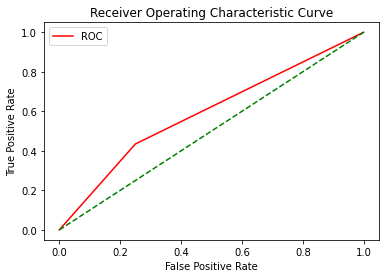

In [831]:
fper_1_1, tper_1_1, thresholds_1_1 = roc_curve(labels_test_caso_3_1, predict_test_caso_3_1)
lr_auc_1_1 = roc_auc_score(labels_test_caso_3_1, predict_test_caso_3_1)
print('AUC:',lr_auc_1_1)
plot_roc_curve(fper_1_1, tper_1_1)

Segundo grupo de atributos.

In [832]:
modelo_caso_3_2, f1_micro_caso_3_2, f1_macro_caso_3_2, enc_caso_3_2 = modeloQDA(df_train_caso_3,keys_2)

In [833]:
f1_micro_caso_3_2

0.5559864064133844

In [834]:
f1_macro_caso_3_2

0.5559864064133844

In [835]:
predict_test_caso_3_2, labels_test_caso_3_2 = predicctions(df_test_caso_3,keys_2,enc_caso_3_2,modelo_caso_3_2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [836]:
f1_macro_test_caso_3_2 = f1_score(labels_test_caso_3_2, predict_test_caso_3_2, average='macro')
f1_macro_test_caso_3_2

0.5970388155262105

AUC: 0.6063179347826086


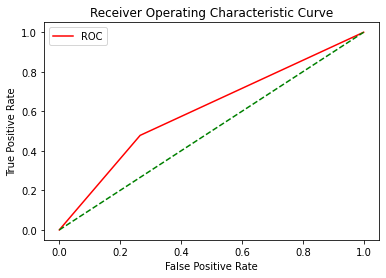

In [837]:
fper_1_2, tper_1_2, thresholds_1_2 = roc_curve(labels_test_caso_3_2, predict_test_caso_3_2)
lr_auc_1_2 = roc_auc_score(labels_test_caso_3_2, predict_test_caso_3_2)
print('AUC:',lr_auc_1_2)
plot_roc_curve(fper_1_2, tper_1_2)

Tercer grupo de atributos.

In [838]:
modelo_caso_3_3, f1_micro_caso_3_3, f1_macro_caso_3_3, enc_caso_3_3 = modeloQDA(df_train_caso_3,keys_3)

In [839]:
f1_micro_caso_3_3

0.6113105611711398

In [840]:
f1_macro_caso_3_3

0.6113105611711398

In [841]:
predict_test_caso_3_3, labels_test_caso_3_3 = predicctions(df_test_caso_3,keys_3,enc_caso_3_3,modelo_caso_3_3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [842]:
f1_macro_test_caso_3_3 = f1_score(labels_test_caso_3_3, predict_test_caso_3_3, average='macro')
f1_macro_test_caso_3_3

0.5543995767942163

AUC: 0.5795969202898551


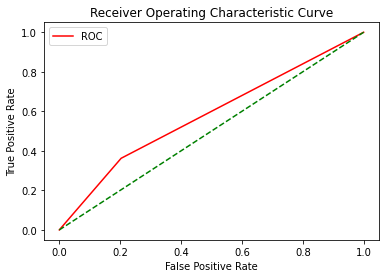

In [843]:
fper_1_3, tper_1_3, thresholds_1_3 = roc_curve(labels_test_caso_3_3, predict_test_caso_3_3)
lr_auc_1_3 = roc_auc_score(labels_test_caso_3_3, predict_test_caso_3_3)
print('AUC:',lr_auc_1_3)
plot_roc_curve(fper_1_3, tper_1_3)

# Regresión Lógistica

La regresión logística es un modelo estadístico para estudiar las relaciones entre un conjunto de variables cualitativas Xi y una variable cualitativa Y. Se trata de un modelo lineal generalizado que utiliza una función logística como función de enlace.

Un modelo de regresión logística también permite predecir la probabilidad de que ocurra un evento (valor de 1) o no (valor de 0) a partir de la optimización de los coeficientes de regresión. Este resultado siempre varía entre 0 y 1. Cuando el valor predicho supera un umbral, es probable que ocurra el evento, mientras que cuando ese valor está por debajo del mismo umbral, no es así.

https://datascientest.com/es/que-es-la-regresion-logistica

##Caso 1: 4 clases

Primer grupo de atributos.

In [844]:
modelo_RL_caso_1_1, f1_micro_RL_caso_1_1, f1_macro_RL_caso_1_1, enc_RL_caso_1_1 = modeloRegLogic(df_train,keys,1e10,10000)

In [845]:
f1_micro_RL_caso_1_1

0.6278234820710006

In [846]:
f1_macro_RL_caso_1_1

0.6278234820710006

In [847]:
predict_test_RL_caso_1_1, labels_test_RL_caso_1_1 = predicctions_RegLogic(df_test,keys,enc_RL_caso_1_1,modelo_RL_caso_1_1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [848]:
f1_macro_test_RL_caso_1_1 = f1_score(labels_test_RL_caso_1_1, predict_test_RL_caso_1_1, average='macro')
f1_macro_test_RL_caso_1_1

0.6511361542412059

Segundo grupo de atributos.

In [849]:
modelo_RL_caso_1_2, f1_micro_RL_caso_1_2, f1_macro_RL_caso_1_2, enc_RL_caso_1_2 = modeloRegLogic(df_train,keys_2,1e10,10000)

In [850]:
f1_micro_RL_caso_1_2

0.564392381293034

In [851]:
f1_macro_RL_caso_1_2

0.564392381293034

In [852]:
predict_test_RL_caso_1_2, labels_test_RL_caso_1_2 = predicctions_RegLogic(df_test,keys_2,enc_RL_caso_1_2,modelo_RL_caso_1_2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [853]:
f1_macro_test_RL_caso_1_2 = f1_score(labels_test_RL_caso_1_2, predict_test_RL_caso_1_2, average='macro')
f1_macro_test_RL_caso_1_2

0.5883650380329252

Tercer grupo de atributos.

In [854]:
modelo_RL_caso_1_3, f1_micro_RL_caso_1_3, f1_macro_RL_caso_1_3, enc_RL_caso_1_3 = modeloRegLogic(df_train,keys_3,1e10,10000)

In [855]:
f1_micro_RL_caso_1_3

0.5293212912456406

In [856]:
f1_macro_RL_caso_1_3

0.5293212912456406

In [857]:
predict_test_RL_caso_1_3, labels_test_RL_caso_1_3 = predicctions_RegLogic(df_test,keys_3,enc_RL_caso_1_3,modelo_RL_caso_1_3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [858]:
f1_macro_test_RL_caso_1_3 = f1_score(labels_test_RL_caso_1_3, predict_test_RL_caso_1_3, average='macro')
f1_macro_test_RL_caso_1_3

0.4275246449240169

##Data sin procesar

Primer grupo de atributos.

In [859]:
modelo_RL_caso_1_1_sin_procesar, f1_micro_RL_caso_1_1_sin_procesar, f1_macro_RL_caso_1_1_sin_procesar, enc_RL_caso_1_1_sin_procesar = modeloRegLogic(df_train_sin_procesar,keys,1e10,10000)

In [860]:
f1_micro_RL_caso_1_1_sin_procesar

0.6171945701357466

In [861]:
f1_macro_RL_caso_1_1_sin_procesar

0.6171945701357466

In [862]:
predict_test_RL_caso_1_1_sin_procesar, labels_test_RL_caso_1_1_sin_procesar = predicctions_RegLogic(df_test_sin_procesar,keys,enc_RL_caso_1_1_sin_procesar,modelo_RL_caso_1_1_sin_procesar)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [863]:
f1_macro_test_RL_caso_1_1_sin_procesar = f1_score(labels_test_RL_caso_1_1_sin_procesar, predict_test_RL_caso_1_1_sin_procesar, average='macro')
f1_macro_test_RL_caso_1_1_sin_procesar

0.6109066263879269

Segundo grupo de atributos.

In [864]:
modelo_RL_caso_1_2_sin_procesar, f1_micro_RL_caso_1_2_sin_procesar, f1_macro_RL_caso_1_2_sin_procesar, enc_RL_caso_1_2_sin_procesar = modeloRegLogic(df_train_sin_procesar,keys_2,1e10,10000)

In [865]:
f1_micro_RL_caso_1_2_sin_procesar

0.5538461538461539

In [866]:
f1_macro_RL_caso_1_2_sin_procesar

0.5538461538461539

In [867]:
predict_test_RL_caso_1_2_sin_procesar, labels_test_RL_caso_1_2_sin_procesar = predicctions_RegLogic(df_test_sin_procesar,keys_2,enc_RL_caso_1_2_sin_procesar,modelo_RL_caso_1_2_sin_procesar)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [868]:
f1_macro_test_RL_caso_1_2_sin_procesar = f1_score(labels_test_RL_caso_1_2_sin_procesar, predict_test_RL_caso_1_2_sin_procesar, average='macro')
f1_macro_test_RL_caso_1_2_sin_procesar

0.5862637524131915

Tercer grupo de atributos.

In [869]:
modelo_RL_caso_1_3_sin_procesar, f1_micro_RL_caso_1_3_sin_procesar, f1_macro_RL_caso_1_3_sin_procesar, enc_RL_caso_1_3_sin_procesar = modeloRegLogic(df_train_sin_procesar,keys_3,1e10,10000)

In [870]:
f1_micro_RL_caso_1_3_sin_procesar

0.5149321266968326

In [871]:
f1_macro_RL_caso_1_3_sin_procesar

0.5149321266968326

In [872]:
predict_test_RL_caso_1_3_sin_procesar, labels_test_RL_caso_1_3_sin_procesar = predicctions_RegLogic(df_test_sin_procesar,keys_3,enc_RL_caso_1_3_sin_procesar,modelo_RL_caso_1_3_sin_procesar)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [873]:
f1_macro_test_RL_caso_1_3_sin_procesar = f1_score(labels_test_RL_caso_1_3_sin_procesar, predict_test_RL_caso_1_3_sin_procesar, average='macro')
f1_macro_test_RL_caso_1_3_sin_procesar

0.4047696617783716

##Caso 2: las 4 clases mas significativas y la suma de las otras

Primer grupo de atributos.

In [874]:
modelo_RL_caso_2_1, f1_micro_RL_caso_2_1, f1_macro_RL_caso_2_1, enc_RL_caso_2_1 = modeloRegLogic(df_train_caso_2,keys,1e10,10000)

In [875]:
f1_micro_RL_caso_2_1

0.6149994725923842

In [876]:
f1_macro_RL_caso_2_1

0.6149994725923842

In [877]:
predict_test_RL_caso_2_1, labels_test_RL_caso_2_1 = predicctions_RegLogic(df_test_caso_2,keys,enc_RL_caso_2_1,modelo_RL_caso_2_1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [878]:
f1_macro_test_RL_caso_2_1 = f1_score(labels_test_RL_caso_2_1, predict_test_RL_caso_2_1, average='macro')
f1_macro_test_RL_caso_2_1

0.6545156306902038

Segundo grupo de atributos.

In [879]:
modelo_RL_caso_2_2, f1_micro_RL_caso_2_2, f1_macro_RL_caso_2_2, enc_RL_caso_2_2 = modeloRegLogic(df_train_caso_2,keys_2,1e10,10000)

In [880]:
f1_micro_RL_caso_2_2

0.5520445835237862

In [881]:
f1_macro_RL_caso_2_2

0.5520445835237862

In [882]:
predict_test_RL_caso_2_2, labels_test_RL_caso_2_2 = predicctions_RegLogic(df_test_caso_2,keys_2,enc_RL_caso_2_2,modelo_RL_caso_2_2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [883]:
f1_macro_test_RL_caso_2_2 = f1_score(labels_test_RL_caso_2_2, predict_test_RL_caso_2_2, average='macro')
f1_macro_test_RL_caso_2_2

0.608026193288594

Tercer grupo de atributos.

In [884]:
modelo_RL_caso_2_3, f1_micro_RL_caso_2_3, f1_macro_RL_caso_2_3, enc_RL_caso_2_3 = modeloRegLogic(df_train_caso_2,keys_3,1e10,10000)

In [885]:
f1_micro_RL_caso_2_3

0.5143138426918885

In [886]:
f1_macro_RL_caso_2_3

0.5143138426918885

In [887]:
predict_test_RL_caso_2_3, labels_test_RL_caso_2_3 = predicctions_RegLogic(df_test_caso_2,keys_3,enc_RL_caso_2_3,modelo_RL_caso_2_3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [888]:
f1_macro_test_RL_caso_2_3 = f1_score(labels_test_RL_caso_2_3, predict_test_RL_caso_2_3, average='macro')
f1_macro_test_RL_caso_2_3

0.4537763417188915

##Data sin procesar

Primer grupo de atributos.

In [889]:
modelo_RL_caso_2_1_sin_procesar, f1_micro_RL_caso_2_1_sin_procesar, f1_macro_RL_caso_2_1_sin_procesar, enc_RL_caso_2_1_sin_procesar = modeloRegLogic(df_train_caso_2_sin_procesar,keys,1e10,10000)

In [890]:
f1_micro_RL_caso_2_1_sin_procesar

0.6149350649350649

In [891]:
f1_macro_RL_caso_2_1_sin_procesar

0.6149350649350649

In [892]:
predict_test_RL_caso_2_1_sin_procesar, labels_test_RL_caso_2_1_sin_procesar = predicctions_RegLogic(df_test_caso_2_sin_procesar,keys,enc_RL_caso_2_1_sin_procesar,modelo_RL_caso_2_1_sin_procesar)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [893]:
f1_macro_test_RL_caso_2_1_sin_procesar = f1_score(labels_test_RL_caso_2_1_sin_procesar, predict_test_RL_caso_2_1_sin_procesar, average='macro')
f1_macro_test_RL_caso_2_1_sin_procesar

0.5791714859003072

Segundo grupo de atributos.

In [894]:
modelo_RL_caso_2_2_sin_procesar, f1_micro_RL_caso_2_2_sin_procesar, f1_macro_RL_caso_2_2_sin_procesar, enc_RL_caso_2_2_sin_procesar = modeloRegLogic(df_train_caso_2_sin_procesar,keys_2,1e10,10000)

In [895]:
f1_micro_RL_caso_2_2_sin_procesar

0.5586768304159608

In [896]:
f1_macro_RL_caso_2_2_sin_procesar

0.5586768304159608

In [897]:
predict_test_RL_caso_2_2_sin_procesar, labels_test_RL_caso_2_2_sin_procesar = predicctions_RegLogic(df_test_caso_2_sin_procesar,keys_2,enc_RL_caso_2_2_sin_procesar,modelo_RL_caso_2_2_sin_procesar)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [898]:
f1_macro_test_RL_caso_2_2_sin_procesar = f1_score(labels_test_RL_caso_2_2_sin_procesar, predict_test_RL_caso_2_2_sin_procesar, average='macro')
f1_macro_test_RL_caso_2_2_sin_procesar

0.5637455806991774

Tercer grupo de atributos.

In [899]:
modelo_RL_caso_2_3_sin_procesar, f1_micro_RL_caso_2_3_sin_procesar, f1_macro_RL_caso_2_3_sin_procesar, enc_RL_caso_2_3_sin_procesar = modeloRegLogic(df_train_caso_2_sin_procesar,keys_3,1e10,10000)

In [900]:
f1_micro_RL_caso_2_3_sin_procesar

0.5150856389986824

In [901]:
f1_macro_RL_caso_2_3_sin_procesar

0.5150856389986824

In [902]:
predict_test_RL_caso_2_3_sin_procesar, labels_test_RL_caso_2_3_sin_procesar = predicctions_RegLogic(df_test_caso_2_sin_procesar,keys_3,enc_RL_caso_2_3_sin_procesar,modelo_RL_caso_2_3_sin_procesar)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [903]:
f1_macro_test_RL_caso_2_3_sin_procesar = f1_score(labels_test_RL_caso_2_3_sin_procesar, predict_test_RL_caso_2_3_sin_procesar, average='macro')
f1_macro_test_RL_caso_2_3_sin_procesar

0.39314222009874183

##Caso 3: las 2 clases mas significtivas

Primer grupo de atributos.

In [904]:
modelo_RL_caso_3_1, f1_micro_RL_caso_3_1, f1_macro_RL_caso_3_1, enc_RL_caso_3_1 = modeloRegLogic(df_train_caso_3,keys,1e10,10000)

In [905]:
f1_micro_RL_caso_3_1

0.6469675845242244

In [906]:
f1_macro_RL_caso_3_1

0.6469675845242244

In [907]:
predict_test_RL_caso_3_1, labels_test_RL_caso_3_1 = predicctions_RegLogic(df_test_caso_3,keys,enc_RL_caso_3_1,modelo_RL_caso_3_1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [908]:
f1_macro_test_RL_caso_3_1 = f1_score(labels_test_RL_caso_3_1, predict_test_RL_caso_3_1, average='macro')
f1_macro_test_RL_caso_3_1

0.6008771929824561

AUC: 0.6152626811594203


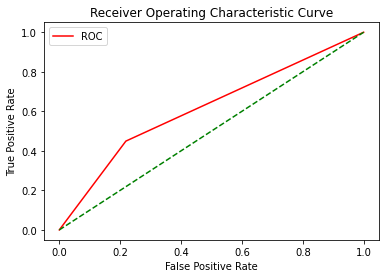

In [909]:
fper_1, tper_1, thresholds_1 = roc_curve(labels_test_RL_caso_3_1, predict_test_RL_caso_3_1)
lr_auc_1 = roc_auc_score(labels_test_RL_caso_3_1, predict_test_RL_caso_3_1)
print('AUC:',lr_auc_1)
plot_roc_curve(fper_1, tper_1)

Segundo grupo de atributos.

In [910]:
modelo_RL_caso_3_2, f1_micro_RL_caso_3_2, f1_macro_RL_caso_3_2, enc_RL_caso_3_2 = modeloRegLogic(df_train_caso_3,keys_2,1e10,10000)

In [911]:
f1_micro_RL_caso_3_2

0.5375827814569536

In [912]:
f1_macro_RL_caso_3_2

0.5375827814569536

In [913]:
predict_test_RL_caso_3_2, labels_test_RL_caso_3_2 = predicctions_RegLogic(df_test_caso_3,keys_2,enc_RL_caso_3_2,modelo_RL_caso_3_2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [914]:
f1_macro_test_RL_caso_3_2 = f1_score(labels_test_RL_caso_3_2, predict_test_RL_caso_3_2, average='macro')
f1_macro_test_RL_caso_3_2

0.5593722755013077

AUC: 0.5784646739130435


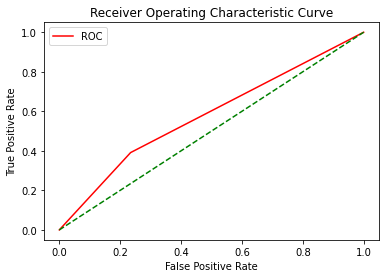

In [915]:
fper_2, tper_2, thresholds_2 = roc_curve(labels_test_RL_caso_3_2, predict_test_RL_caso_3_2)
lr_auc_2 = roc_auc_score(labels_test_RL_caso_3_2, predict_test_RL_caso_3_2)
print('AUC:',lr_auc_2)
plot_roc_curve(fper_2, tper_2)

Tercer grupo de atributos.

In [916]:
modelo_RL_caso_3_3, f1_micro_RL_caso_3_3, f1_macro_RL_caso_3_3, enc_RL_caso_3_3 = modeloRegLogic(df_train_caso_3,keys_3,1e10,10000)

In [917]:
f1_micro_RL_caso_3_3

0.6496078773091669

In [918]:
f1_macro_RL_caso_3_3

0.6496078773091669

In [919]:
predict_test_RL_caso_3_3, labels_test_RL_caso_3_3 = predicctions_RegLogic(df_test_caso_3,keys_3,enc_RL_caso_3_3,modelo_RL_caso_3_3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [920]:
f1_macro_test_RL_caso_3_3 = f1_score(labels_test_RL_caso_3_3, predict_test_RL_caso_3_3, average='macro')
f1_macro_test_RL_caso_3_3

0.5608490566037736

AUC: 0.5874094202898551


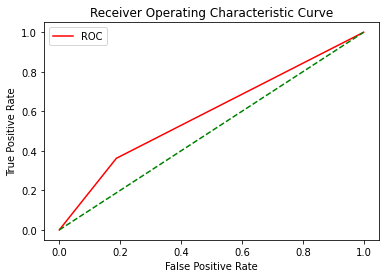

In [921]:
fper_3, tper_3, thresholds_3 = roc_curve(labels_test_RL_caso_3_3, predict_test_RL_caso_3_3)
lr_auc_3 = roc_auc_score(labels_test_RL_caso_3_3, predict_test_RL_caso_3_3)
print('AUC:',lr_auc_3)
plot_roc_curve(fper_3, tper_3)

##Resultados

Aca se presentan los valores de validacion a partir(f1 macro) de los que se decidira que modelo utilizar.

In [922]:
resultados_QDA_2 = [[f1_macro, f1_macro_caso_2_1, f1_macro_caso_3_1, 'QDA'],
         [f1_macro_2, f1_macro_caso_2_2, f1_macro_caso_3_2, 'QDA'],
         [f1_macro_3 ,f1_macro_caso_2_3, f1_macro_caso_3_3, 'QDA'],
         [f1_macro_sin_procesar, f1_macro_caso_2_1_sin_procesar, 'N/A', 'QDA'],
         [f1_macro_sin_procesar_2,f1_macro_caso_2_2_sin_procesar, 'N/A', 'QDA'],
         [f1_macro_sin_procesar_3, f1_macro_caso_2_3_sin_procesar, 'N/A', 'QDA']]

columnas_2 = ['CASO 1', 'CASO 2', 'CASO 3', 'MODELO'] # definimos los nombres de las columnas
filas_2 = ['KEY', 'KEY2', 'KEY3','KEY_sp', 'KEY2_sp', 'KEY3_sp'] # definimos los nombres de las filas

resultados_QDA_2 = pd.DataFrame(resultados_QDA_2, columns=columnas_2, index=filas_2)

print(resultados_QDA_2)




           CASO 1    CASO 2    CASO 3 MODELO
KEY      0.596575  0.595703  0.607398    QDA
KEY2     0.571041  0.557927  0.555986    QDA
KEY3     0.503765  0.487427  0.611311    QDA
KEY_sp   0.606335  0.597497       N/A    QDA
KEY2_sp  0.554751  0.565817       N/A    QDA
KEY3_sp  0.500452  0.495263       N/A    QDA


Se puede ver que para modelo QDA se obtuvo como mejor resultado:

* Para el caso 1: usar la KEY 1 sin procesar
* Para el caso 2: usar la KEY 1 sin procesar
* Para el caso 3: usar la KEY 3 la cual tambien esta sin procesar

Por lo que para este modelo se podria necesitar que la diferencia en la cantidad de datos no resulta determinante.

Si bien la diferencia es muy pequeña, el mejor resulto la combinacion de la key 3 con el modelo binario.

Sin embargo seria mejor probar todas las combinaciones posibles para tener un resultado mas certero.



In [923]:
resultados_RL_2=[[f1_macro_RL_caso_1_1,f1_macro_RL_caso_2_1, f1_macro_RL_caso_3_1, 'RL'],
              [f1_macro_RL_caso_1_2, f1_macro_RL_caso_2_2, f1_macro_RL_caso_3_2, 'RL'],
              [f1_macro_RL_caso_1_3, f1_macro_RL_caso_2_3, f1_macro_RL_caso_3_3, 'RL'],
              [f1_macro_RL_caso_1_1_sin_procesar, f1_macro_RL_caso_2_1_sin_procesar, 'N/A', 'RL'],
              [f1_macro_RL_caso_1_2_sin_procesar, f1_macro_RL_caso_2_2_sin_procesar, 'N/A', 'RL'],
              [f1_macro_RL_caso_1_3_sin_procesar, f1_macro_RL_caso_2_3_sin_procesar, 'N/A', 'RL']]

columnas_RL_2= ['CASO 1', 'CASO 2', 'CASO 3', 'MODELO'] # definimos los nombres de las columnas
filas_RL_2 = ['KEY', 'KEY2', 'KEY3','KEY_sp', 'KEY2_sp', 'KEY3_sp'] # definimos los nombres de las filas

resultados_RL_2 = pd.DataFrame(resultados_RL_2, columns=columnas_RL_2, index=filas_RL_2)

print(resultados_RL_2)


           CASO 1    CASO 2    CASO 3 MODELO
KEY      0.627823  0.614999  0.646968     RL
KEY2     0.564392  0.552045  0.537583     RL
KEY3     0.529321  0.514314  0.649608     RL
KEY_sp   0.617195  0.614935       N/A     RL
KEY2_sp  0.553846  0.558677       N/A     RL
KEY3_sp  0.514932  0.515086       N/A     RL


Se puede ver que para modelo RL se obtuvo como mejor resultado:



*   Para el caso 1: usar la KEY 1
*   Para el caso 2: usar la KEY 1 
*   Para el caso 3: usar la KEY 1

Para este metodo resulto mejor procesar los datos, en particular para el caso 1 y 2, sin embargo el mejor resultado se obtuvo con el caso binario usando la key 1, donde en este caso, los datos no estan procesados.

Al igual que el anterior, solo se probo tres combinaciones de atributos por lo que quiza seria mejor probar todas las combinaciones posibles para tener un resultado mas certero.

Aca se presentan los valores de las predicciones sobre el testeo.

In [924]:
resultados_QDA = [[f1_macro_test, f1_macro_test_caso_2_1, f1_macro_test_caso_3_1, 'QDA'],
         [f1_macro_test_2, f1_macro_test_caso_2_2, f1_macro_test_caso_3_2, 'QDA'],
         [f1_macro_test_3 ,f1_macro_test_caso_2_3, f1_macro_test_caso_3_3, 'QDA'],
         [f1_macro_test_sin_procesar, f1_macro_test_caso_2_1_sin_procesar, 'N/A', 'QDA'],
         [f1_macro_test_sin_procesar_2,f1_macro_test_caso_2_2_sin_procesar, 'N/A', 'QDA'],
         [f1_macro_test_sin_procesar_3, f1_macro_test_caso_2_3_sin_procesar, 'N/A', 'QDA']]

columnas = ['CASO 1', 'CASO 2', 'CASO 3', 'MODELO'] # definimos los nombres de las columnas
filas = ['KEY', 'KEY2', 'KEY3','KEY_sp', 'KEY2_sp', 'KEY3_sp'] # definimos los nombres de las filas

resultados_QDA = pd.DataFrame(resultados_QDA, columns=columnas, index=filas)

print(resultados_QDA)



           CASO 1    CASO 2    CASO 3 MODELO
KEY      0.661627  0.649698   0.57875    QDA
KEY2     0.613700  0.602736  0.597039    QDA
KEY3     0.450331  0.430122    0.5544    QDA
KEY_sp   0.634936  0.605156       N/A    QDA
KEY2_sp  0.617029  0.579662       N/A    QDA
KEY3_sp  0.417867  0.397227       N/A    QDA


Entonces el mejor resultado que se presenta para el modelo QDA es: 0.5544







In [925]:
resultados_RL=[[f1_macro_test_RL_caso_1_1,f1_macro_test_RL_caso_2_1, f1_macro_test_RL_caso_3_1, 'RL'],
              [f1_macro_test_RL_caso_1_2, f1_macro_test_RL_caso_2_2, f1_macro_test_RL_caso_3_2, 'RL'],
              [f1_macro_test_RL_caso_1_3, f1_macro_test_RL_caso_2_3, f1_macro_test_RL_caso_3_3, 'RL'],
              [f1_macro_test_RL_caso_1_1_sin_procesar, f1_macro_test_RL_caso_2_1_sin_procesar, 'N/A', 'RL'],
              [f1_macro_test_RL_caso_1_2_sin_procesar, f1_macro_test_RL_caso_2_2_sin_procesar, 'N/A', 'RL'],
              [f1_macro_test_RL_caso_1_3_sin_procesar, f1_macro_test_RL_caso_2_3_sin_procesar, 'N/A', 'RL']]

columnas_RL = ['CASO 1', 'CASO 2', 'CASO 3', 'MODELO'] # definimos los nombres de las columnas
filas_RL = ['KEY', 'KEY2', 'KEY3','KEY_sp', 'KEY2_sp', 'KEY3_sp'] # definimos los nombres de las filas

resultados_RL = pd.DataFrame(resultados_RL, columns=columnas_RL, index=filas_RL)

print(resultados_RL)


           CASO 1    CASO 2    CASO 3 MODELO
KEY      0.651136  0.654516  0.600877     RL
KEY2     0.588365  0.608026  0.559372     RL
KEY3     0.427525  0.453776  0.560849     RL
KEY_sp   0.610907  0.579171       N/A     RL
KEY2_sp  0.586264  0.563746       N/A     RL
KEY3_sp  0.404770  0.393142       N/A     RL


Entonces el mejor resultado que se presenta para el modelo QDA es: 0.600087

